# **Importing Libraries**

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import joblib 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Data**


In [39]:
# Load dataset
df = pd.read_csv("movies_dataset.csv")

In [40]:
df.head()

,title,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
0,10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1,12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
3,28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
4,300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [41]:
df.describe

<bound method NDFrame.describe of                                  title    1    2    3    4    5    6    7  \
0    10 Things I Hate About You (1999)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                  12 Angry Men (1957)  0.0  0.0  0.0  5.0  0.0  0.0  0.0   
2         2001: A Space Odyssey (1968)  0.0  0.0  0.0  0.0  0.0  0.0  4.0   
3                 28 Days Later (2002)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                           300 (2007)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..                                 ...  ...  ...  ...  ...  ...  ...  ...   
445            X2: X-Men United (2003)  0.0  0.0  0.0  0.0  0.0  0.0  4.0   
446             You've Got Mail (1998)  0.0  0.0  0.5  0.0  0.0  0.0  0.0   
447          Young Frankenstein (1974)  5.0  0.0  0.0  0.0  0.0  0.0  0.0   
448                  Zombieland (2009)  0.0  3.0  0.0  0.0  0.0  0.0  0.0   
449                   Zoolander (2001)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       8    9  ...  601  602  603  604  6

In [42]:
# Check if 'rating' column exists in the DataFrame
print(df.columns)

Index(['title', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '601', '602', '603', '604', '605', '606', '607', '608', '609', '610'],
      dtype='object', length=607)


# **Pre-Processing**

In [43]:
# Extract released year from movie titles and create a new column
df['Released Year'] = df['title'].str.extract(r'\((\d{4})\)')
df['title'] = df['title'].replace(r'\s\(\d{4}\)', '', regex=True)  # Remove the year from the Title column
# Save the preprocessed data
df.to_csv("preprocessed_movies_dataset.csv", index=False)


In [44]:
df.head()

,title,1,2,3,4,5,6,7,8,9,...,602,603,604,605,606,607,608,609,610,Released Year
0,10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1999
1,12 Angry Men,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1957
2,2001: A Space Odyssey,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5,1968
3,28 Days Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0,2002
4,300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0,2007


# **Encoding**

In [48]:
# Encode movie titles
label_encoder = LabelEncoder()
df['Title_encoded'] = label_encoder.fit_transform(df['title'])

# Update the cosine similarity matrix to use the encoded titles as indices
cosine_sim_df = pd.DataFrame(
    cosine_similarity(df.drop(columns=['title', 'Title_encoded', 'Released Year'])),
    index=df['Title_encoded'],
    columns=df['Title_encoded']
)

# Modify the get_movie_recommendations function to use the encoded title index
def get_movie_recommendations(movie_title, cosine_sim_df, df):
    movie_index = df[df['title'] == movie_title]['Title_encoded'].iloc[0]
    similar_movies = cosine_sim_df.loc[movie_index].sort_values(ascending=False)
    recommendations = similar_movies.index[1:4]  # Get top 3 recommendations (excluding the input movie itself)
    recommended_movies = df.loc[recommendations, 'title'].tolist()
    return recommended_movies

In [49]:
# Save the Linear Regression model as a Pickle file
label_encoder_filename = 'label_encoder_model.pkl'
joblib.dump(label_encoder, label_encoder_filename)
print(f"label_encoder model saved as Pickle file to {label_encoder_filename}")

label_encoder model saved as Pickle file to label_encoder_model.pkl


# **Model**

In [52]:
# Load dataset
df = pd.read_csv("movies_dataset.csv")

# Label encode movie titles
label_encoder = LabelEncoder()
df['Title_encoded'] = label_encoder.fit_transform(df['title'])

# Create a user-movie matrix
user_movie_matrix = df.set_index('Title_encoded').drop(columns=['title'])

# Calculate the cosine similarity between movies
cosine_sim = cosine_similarity(user_movie_matrix, user_movie_matrix)

# Create a DataFrame with the similarity scores
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# Save the model
joblib.dump(cosine_sim_df, 'cosine_similarity_model.joblib')

# Function to get movie recommendations based on user's input
def get_movie_recommendations(movie_title, cosine_sim_df, df):
    movie_index = df[df['title'] == movie_title]['Title_encoded'].iloc[0]
    similar_movies = cosine_sim_df[movie_index].sort_values(ascending=False)
    recommendations = similar_movies.index[1:4]  # Get top 3 recommendations (excluding the input movie itself)
    recommended_movies = df[df['Title_encoded'].isin(recommendations)]['title'].tolist()
    return recommended_movies

# Example usage:
input_movie = "12 Angry Men (1957)"
recommended_movies = get_movie_recommendations(input_movie, cosine_sim_df, df)
print(f"\nRecommended movies for '{input_movie}': {recommended_movies}")

# Load the model
loaded_model = joblib.load('cosine_similarity_model.joblib')



Recommended movies for '12 Angry Men (1957)': ['Casablanca (1942)', "It's a Wonderful Life (1946)", "One Flew Over the Cuckoo's Nest (1975)"]


In [ ]:
# Save the Linear Regression model as a Pickle file
cosine_similarity_model_filename = 'cosine_similarity_model.pkl'
joblib.dump(cosine_similarity, cosine_similarity_model_filename)
print(f"cosine_similarity_model model saved as Pickle file to {cosine_similarity_model_filename}")

cosine_similarity_model model saved as Pickle file to cosine_similarity_model.pkl


# **Evaluation**

In [54]:
def evaluate_model(df, cosine_sim_df, number_of_users=10, top_ratings=5):
    # Evaluate the model for a subset of users
    user_ids = [str(i) for i in range(1, number_of_users + 1)]
    for user_id in user_ids:
        user_ratings = df[user_id].sort_values(ascending=False).head(top_ratings)
        liked_movies = user_ratings.index[user_ratings > 0].tolist()  # Movies the user has rated positively
        
        # Check if recommendations for the liked movies are also liked by the user
        for movie_index in liked_movies:
            movie_title = df.loc[movie_index, 'title']
            recommendations = get_movie_recommendations(movie_title, cosine_sim_df, df)
            recommended_movie_indices = df[df['title'].isin(recommendations)].index
            
            # Calculate how many recommendations the user has also rated highly
            intersection = set(recommended_movie_indices) & set(liked_movies)
            print(f"User {user_id} liked {movie_title}, recommended movies intersect with liked movies: {len(intersection)}")

evaluate_model(df, cosine_sim_df)


User 1 liked Star Wars: Episode IV - A New Hope (1977), recommended movies intersect with liked movies: 0
User 1 liked Citizen Kane (1941), recommended movies intersect with liked movies: 0
User 1 liked Goonies, The (1985), recommended movies intersect with liked movies: 0
User 1 liked Desperado (1995), recommended movies intersect with liked movies: 0
User 1 liked Green Mile, The (1999), recommended movies intersect with liked movies: 0
User 2 liked Wolf of Wall Street, The (2013), recommended movies intersect with liked movies: 0
User 2 liked Inglourious Basterds (2009), recommended movies intersect with liked movies: 0
User 2 liked Dark Knight, The (2008), recommended movies intersect with liked movies: 0
User 2 liked Good Will Hunting (1997), recommended movies intersect with liked movies: 0
User 2 liked Kill Bill: Vol. 1 (2003), recommended movies intersect with liked movies: 0
User 3 liked Tron (1982), recommended movies intersect with liked movies: 0
User 3 liked Field of Dreams

# **Visualization**

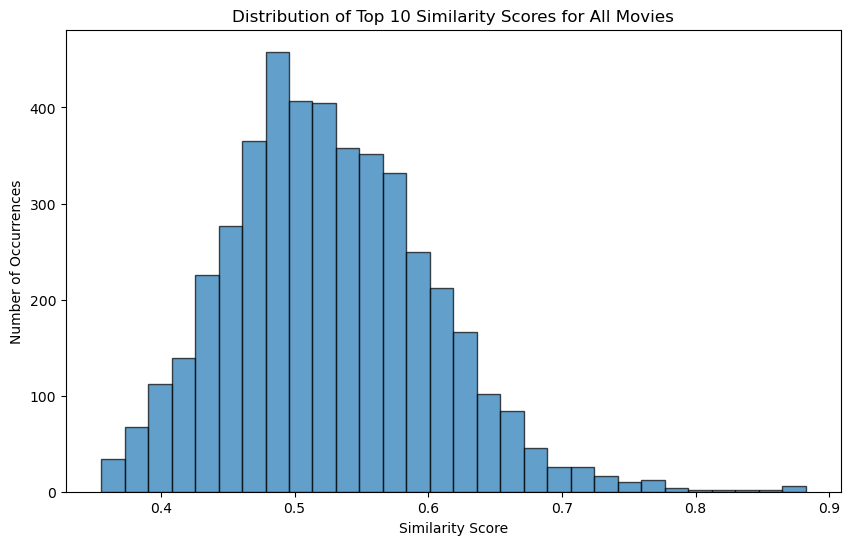

In [53]:
def plot_similarity_distribution(cosine_sim_df, df, N=10):
    # This will hold all the similarity scores for the top N recommendations for each movie
    all_scores = []
    
    # Go through each movie in the DataFrame
    for movie_idx in df['Title_encoded'].values:
        # Get the similarity scores for this movie against all other movies
        sim_scores = cosine_sim_df.loc[movie_idx].sort_values(ascending=False)
        
        # Get the top N scores (excluding the first one as it is the similarity of the movie with itself)
        top_scores = sim_scores.iloc[1:N+1]
        all_scores.extend(top_scores)
    
    # Now plot the distribution of top N similarity scores
    plt.figure(figsize=(10, 6))
    plt.hist(all_scores, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of Top {N} Similarity Scores for All Movies')
    plt.xlabel('Similarity Score')
    plt.ylabel('Number of Occurrences')
    plt.show()

# Call the function to plot the distribution
plot_similarity_distribution(cosine_sim_df, df, N=10)


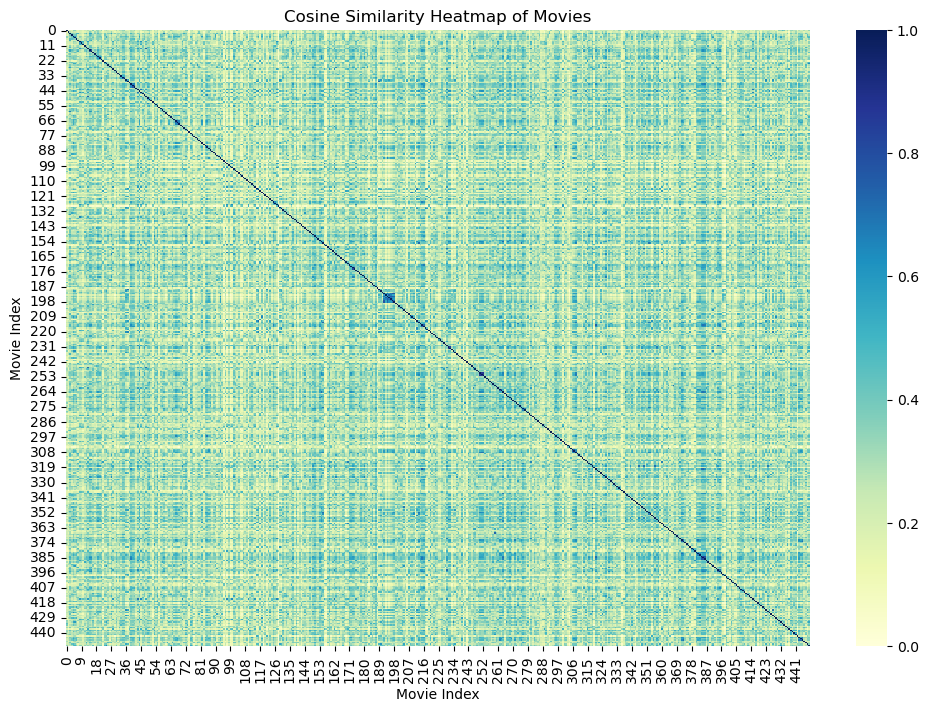

In [55]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(cosine_sim_df, cmap="YlGnBu", annot=False)  # Change cmap as desired

# Set the title and labels
plt.title("Cosine Similarity Heatmap of Movies")
plt.xlabel("Movie Index")
plt.ylabel("Movie Index")

# Show the heatmap
plt.show()
